# Tutorial - Step1: MTMR pretraining with only contractive loss

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from MTMR.vae import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "drd2"
TEST_NUM = "10"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_5-1_{PROPERTY_NAME.upper()}_pretraining_{TEST_NUM}"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             use_contractive=True,
                                             use_margin=False,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 3.501  loss_recon_src(tr): 3.497  loss_recon_tar(tr): 3.505  loss_recon_neg(tr): 3.500  loss_contractive(tr): 0.497  loss_margin(tr): 1.940  beta: 0.000  gamma: 0.000  valid_ratio(va): 0.082  similarity(va): 0.002
[00001000/00100000]  loss(tr): 0.542  loss_recon_src(tr): 0.610  loss_recon_tar(tr): 0.456  loss_recon_neg(tr): 0.508  loss_contractive(tr): 0.954  loss_margin(tr): 0.766  beta: 0.020  gamma: 0.000  valid_ratio(va): 0.992  similarity(va): 0.182
[00002000/00100000]  loss(tr): 0.391  loss_recon_src(tr): 0.469  loss_recon_tar(tr): 0.274  loss_recon_neg(tr): 0.348  loss_contractive(tr): 0.725  loss_margin(tr): 1.104  beta: 0.040  gamma: 0.000  valid_ratio(va): 1.000  similarity(va): 0.217
[00003000/00100000]  loss(tr): 0.337  loss_recon_src(tr): 0.391  loss_recon_tar(tr): 0.197  loss_recon_neg(tr): 0.319  loss_contractive(tr): 0.552  loss_margin(tr): 1.396  beta: 0.060  gamma: 0.000  valid_ratio(va): 0.996  similarity(va): 0.224
[00004000/00100000] 

[00034000/00100000]  loss(tr): 0.103  loss_recon_src(tr): 0.128  loss_recon_tar(tr): 0.035  loss_recon_neg(tr): 0.075  loss_contractive(tr): 0.036  loss_margin(tr): 2.530  beta: 0.680  gamma: 0.000  valid_ratio(va): 0.996  similarity(va): 0.410
[00035000/00100000]  loss(tr): 0.087  loss_recon_src(tr): 0.098  loss_recon_tar(tr): 0.035  loss_recon_neg(tr): 0.056  loss_contractive(tr): 0.035  loss_margin(tr): 2.532  beta: 0.700  gamma: 0.000  valid_ratio(va): 0.998  similarity(va): 0.406
[00036000/00100000]  loss(tr): 0.103  loss_recon_src(tr): 0.110  loss_recon_tar(tr): 0.034  loss_recon_neg(tr): 0.085  loss_contractive(tr): 0.036  loss_margin(tr): 2.534  beta: 0.720  gamma: 0.000  valid_ratio(va): 0.996  similarity(va): 0.409
[00037000/00100000]  loss(tr): 0.093  loss_recon_src(tr): 0.122  loss_recon_tar(tr): 0.023  loss_recon_neg(tr): 0.064  loss_contractive(tr): 0.033  loss_margin(tr): 2.537  beta: 0.740  gamma: 0.000  valid_ratio(va): 0.998  similarity(va): 0.404
[00038000/00100000] 

[00068000/00100000]  loss(tr): 0.072  loss_recon_src(tr): 0.084  loss_recon_tar(tr): 0.019  loss_recon_neg(tr): 0.054  loss_contractive(tr): 0.019  loss_margin(tr): 2.570  beta: 1.000  gamma: 0.000  valid_ratio(va): 0.982  similarity(va): 0.435
[00069000/00100000]  loss(tr): 0.068  loss_recon_src(tr): 0.075  loss_recon_tar(tr): 0.021  loss_recon_neg(tr): 0.052  loss_contractive(tr): 0.019  loss_margin(tr): 2.574  beta: 1.000  gamma: 0.000  valid_ratio(va): 0.986  similarity(va): 0.434
[00070000/00100000]  loss(tr): 0.056  loss_recon_src(tr): 0.070  loss_recon_tar(tr): 0.009  loss_recon_neg(tr): 0.036  loss_contractive(tr): 0.018  loss_margin(tr): 2.577  beta: 1.000  gamma: 0.000  valid_ratio(va): 0.992  similarity(va): 0.420
[00071000/00100000]  loss(tr): 0.065  loss_recon_src(tr): 0.078  loss_recon_tar(tr): 0.013  loss_recon_neg(tr): 0.046  loss_contractive(tr): 0.019  loss_margin(tr): 2.576  beta: 1.000  gamma: 0.000  valid_ratio(va): 0.996  similarity(va): 0.440
[00072000/00100000] 

## 9. Visualize for loss analysis

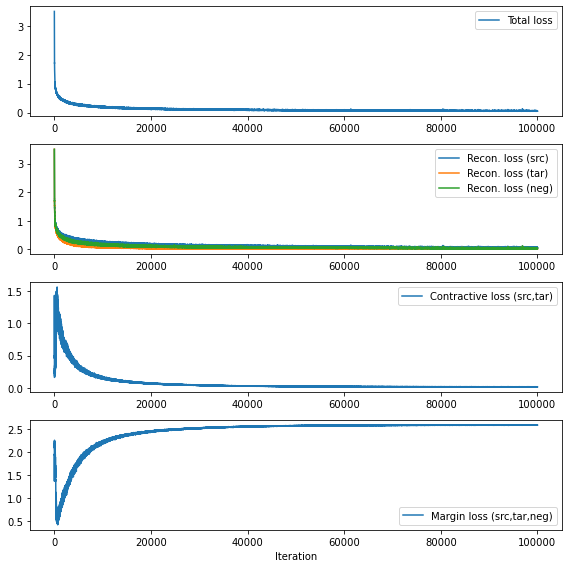

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_CONTRACTIVE"], label="Contractive loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_MARGIN"], label="Margin loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

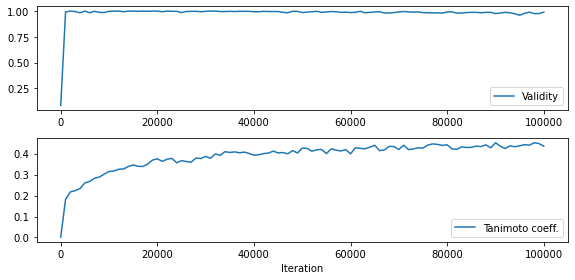

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()